In [48]:
import torch
import pyro
from torch import distributions as dist
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Figure 1.7

- Changed = line 18 and 19

/var/folders/5n/lzw120x534d6n5nbhk8qwzjr0000gs/T/ipykernel_28259/2819953344.py:22: RuntimeWarning: invalid value encountered in true_divide
  axes[idx].plot(np.divide(y, N), 0, color="k", marker="o", ms=12)
/var/folders/5n/lzw120x534d6n5nbhk8qwzjr0000gs/T/ipykernel_28259/2819953344.py:22: RuntimeWarning: invalid value encountered in true_divide
  axes[idx].plot(np.divide(y, N), 0, color="k", marker="o", ms=12)
/var/folders/5n/lzw120x534d6n5nbhk8qwzjr0000gs/T/ipykernel_28259/2819953344.py:22: RuntimeWarning: invalid value encountered in true_divide
  axes[idx].plot(np.divide(y, N), 0, color="k", marker="o", ms=12)


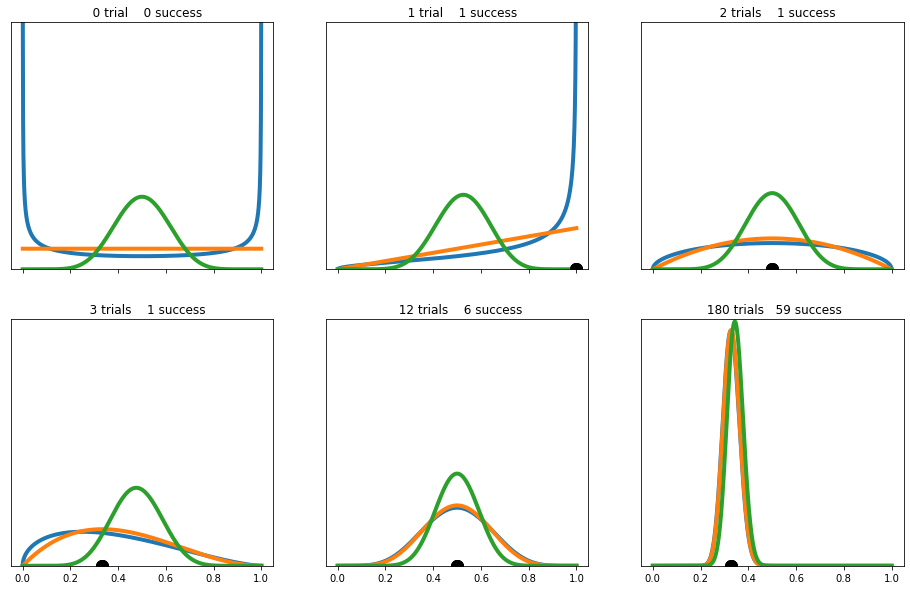

In [51]:
_, axes = plt.subplots(2,  3, sharey=True, sharex=True, figsize=(16, 10))
axes = np.ravel(axes)

n_trials = [0, 1, 2, 3, 12, 180] ## N
success = [0, 1, 1, 1, 6, 59] ## y
data = zip(n_trials, success)

beta_params = [(0.5, 0.5), (1, 1), (10, 10)]
theta = np.linspace(0, 1, 1500) ## vals of theta to be evaluated

for idx, (N, y) in enumerate(data):
    s_n = ("s" if (N > 1) else "")

    for jdx, (a_prior, b_prior) in enumerate(beta_params):
        
        posterior = dist.Beta(a_prior + y, b_prior + N - y)
        p_theta_given_y = posterior.log_prob(value=torch.from_numpy(theta))

        axes[idx].plot(theta, np.exp(p_theta_given_y.numpy()), lw=4)
        axes[idx].set_yticks([])
        axes[idx].set_ylim(0, 12)
        axes[idx].plot(np.divide(y, N), 0, color="k", marker="o", ms=12)
        axes[idx].set_title(f"{N:4d} trial{s_n} {y:4d} success")